In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../TileEM/

/home/jlee782/crowd-seg/analysis/TileEM


In [16]:
from paper_visualizations import * 
from glob import glob

In [4]:
worker_Nbatches={5:10,10:8,15:6,20:4,25:2,30:1}
sampleN_lst=worker_Nbatches.keys()
Nsample_lst = worker_Nbatches.keys()

# Data Table 

In [163]:
Tile_tbl = pd.read_csv("Tile_PR_all.csv",index_col=0)

Tile_tbl = Tile_tbl.rename(index=str,columns={'P [TileEM thres=-40]':'P [TileEM thres=-4]',\
                                               'P [TileEM thres=-20]':'P [TileEM thres=-2]',\
                                               'R [TileEM thres=-40]':'R [TileEM thres=-4]',\
                                              'R [TileEM thres=-20]':'R [TileEM thres=-2]',\
                                              'J [TileEM thres=-40]':'J [TileEM thres=-4]',\
                                              'J [TileEM thres=-20]':'J [TileEM thres=-2]',\
                                              'P [TileEM thres=40]':'P [TileEM thres=4]',\
                                               'P [TileEM thres=20]':'P [TileEM thres=2]',\
                                               'R [TileEM thres=40]':'R [TileEM thres=4]',\
                                              'R [TileEM thres=20]':'R [TileEM thres=2]',\
                                              'J [TileEM thres=40]':'J [TileEM thres=4]',\
                                              'J [TileEM thres=20]':'J [TileEM thres=2]'})
Pixel_tbl = pd.read_csv("Pixel_PR.csv",index_col=0)
#PR_tbl = PR_tbl.rename(index=str,columns={'GT Tile-based Precision':'P [GT Tile-based]','GT Tile-based Recall':'R [GT Tile-based]'})
df_all = Pixel_tbl.merge(Tile_tbl)

In [164]:
Tile_tbl.keys()

Index([u'object_id', u'Nworker', u'batch_num', u'P [TileEM thres=-4]',
       u'R [TileEM thres=-4]', u'J [TileEM thres=-4]', u'P [TileEM thres=-2]',
       u'R [TileEM thres=-2]', u'J [TileEM thres=-2]', u'P [TileEM thres=0]',
       u'R [TileEM thres=0]', u'J [TileEM thres=0]', u'P [TileEM thres=2]',
       u'R [TileEM thres=2]', u'J [TileEM thres=2]', u'P [TileEM thres=4]',
       u'R [TileEM thres=4]', u'J [TileEM thres=4]', u'P [MVT]', u'R [MVT]',
       u'J [MVT]'],
      dtype='object')

In [165]:
Tile_tbl.groupby("Nworker").mean()

,object_id,batch_num,P [TileEM thres=-4],R [TileEM thres=-4],J [TileEM thres=-4],P [TileEM thres=-2],R [TileEM thres=-2],J [TileEM thres=-2],P [TileEM thres=0],R [TileEM thres=0],J [TileEM thres=0],P [TileEM thres=2],R [TileEM thres=2],J [TileEM thres=2],P [TileEM thres=4],R [TileEM thres=4],J [TileEM thres=4],P [MVT],R [MVT],J [MVT]
Nworker,,,,,,,,,,,,,,,,,,,,
5,22.870423,4.166197,0.850881,0.961415,0.819247,0.870093,0.953556,0.831399,0.892499,0.941217,0.842229,0.908071,0.916692,0.834775,0.926148,0.875430,0.812027,0.926148,0.875430,0.812027
10,22.797468,2.518987,0.880648,0.959165,0.845865,0.891869,0.947141,0.846086,0.901894,0.938503,0.848144,0.906950,0.924074,0.840418,0.919437,0.905108,0.834574,0.929818,0.903917,0.843780
15,17.482759,1.000000,0.916201,0.934875,0.857733,0.942520,0.927573,0.876843,0.944351,0.921268,0.872606,0.944211,0.911300,0.863006,0.948034,0.900244,0.855841,0.968567,0.919359,0.890368


In [166]:
Pixel_tbl.groupby("Nworker").mean()

,object_id,batch_num,P [Num Points],R [Num Points],J [Num Points],P [Area Ratio],R [Area Ratio],J [Area Ratio],P [Jaccard [Self]],R [Jaccard [Self]],...,J [PixelEM thres=4],P [PixelEM thres=10],R [PixelEM thres=10],J [PixelEM thres=10],P [PixelEM thres=-10],R [PixelEM thres=-10],J [PixelEM thres=-10],P [MV],R [MV],J [MV]
Nworker,,,,,,,,,,,,,,,,,,,,,
5,23.377778,4.5,0.853849,0.871667,0.794569,0.783684,0.892408,0.752687,0.903786,0.906610,...,0.859650,0.884737,0.746375,0.733085,0.770035,0.976444,0.751707,0.936947,0.929064,0.873103
10,23.377778,3.5,0.821617,0.843744,0.758166,0.717399,0.874067,0.695418,0.910508,0.910700,...,0.873741,0.968211,0.878582,0.853452,0.915767,0.958504,0.880300,0.952477,0.915664,0.874990
15,23.377778,2.5,0.818526,0.857476,0.759058,0.685180,0.875356,0.666941,0.911184,0.912126,...,0.884214,0.960579,0.906199,0.873496,0.923910,0.953170,0.883794,0.943713,0.934747,0.885358
20,23.377778,1.5,0.817875,0.856910,0.765056,0.666300,0.861115,0.649016,0.911156,0.916281,...,0.884235,0.958013,0.917094,0.881566,0.932207,0.945542,0.884267,0.948845,0.928552,0.884085
25,23.377778,0.5,0.809557,0.861056,0.766579,0.634180,0.853012,0.619881,0.914681,0.916131,...,0.886366,0.954406,0.922292,0.883414,0.933129,0.945625,0.885659,0.944125,0.933923,0.884883
30,23.377778,0.0,0.783323,0.835223,0.737786,0.621400,0.842827,0.607767,0.916069,0.917527,...,0.890188,0.956147,0.925748,0.888499,0.936729,0.943886,0.887633,0.949690,0.931701,0.888173


In [169]:
df_all.groupby("Nworker").mean()

,object_id,batch_num,P [Num Points],R [Num Points],J [Num Points],P [Area Ratio],R [Area Ratio],J [Area Ratio],P [Jaccard [Self]],R [Jaccard [Self]],...,J [TileEM thres=0],P [TileEM thres=2],R [TileEM thres=2],J [TileEM thres=2],P [TileEM thres=4],R [TileEM thres=4],J [TileEM thres=4],P [MVT],R [MVT],J [MVT]
Nworker,,,,,,,,,,,,,,,,,,,,,
5,22.554913,4.167630,0.845731,0.868235,0.789505,0.783933,0.885831,0.754041,0.896089,0.900700,...,0.859842,0.926511,0.914777,0.851322,0.943428,0.872676,0.826397,0.943428,0.872676,0.826397
10,22.480519,2.519481,0.794037,0.812381,0.721806,0.697155,0.850653,0.675807,0.902025,0.901324,...,0.864800,0.926308,0.922199,0.857938,0.939412,0.902703,0.852171,0.939412,0.902703,0.852171
15,16.857143,1.000000,0.845188,0.885065,0.774834,0.683581,0.902565,0.668758,0.953590,0.959730,...,0.872606,0.944211,0.911300,0.863006,0.948034,0.900244,0.855841,0.968567,0.919359,0.890368


In [167]:
# base_dir = 'stored_ptk_run'
# for Nworker in sampleN_lst:
#     for batch_num in range(worker_Nbatches[Nworker]):
#         dir_name = "{0}worker_rand{1}".format(Nworker,batch_num)

#         print "Working on :", dir_name
#         os.chdir(base_dir+dir_name)
        
#         PR_tbl = pd.read_csv("GT_PR.csv",index_col=0)
#         PR_tbl = PR_tbl.rename(index=str,columns={'GT Tile-based Precision':'P [GT Tile-based]','GT Tile-based Recall':'R [GT Tile-based]'})
#         #df = df.merge(PR_tbl[["object_id","P [GT Tile-based]","R [GT Tile-based]"]],on="object_id")
#         os.chdir("../../")

In [155]:
def selected_attr2col_lst(selected_attr_lst):
    selected_col_lst =[]
    for attr in selected_attr_lst:
        selected_col_lst.append("P [{}]".format(attr))
        selected_col_lst.append("R [{}]".format(attr))
        selected_col_lst.append("J [{}]".format(attr))
    return selected_col_lst

In [156]:
from tabulate import tabulate

In [157]:
# best_TileEM_attr = 'TileEM thres=40'
#'GT Precision','GT Recall','GT Jaccard',
selected_attr_lst = ['Num Points','Area Ratio','MV','PixelEM thres=0','TileEM thres=0']
# selected_attr_lst.append(best_TileEM_attr)
selected_col_lst = selected_attr2col_lst(selected_attr_lst)
threshold_attr_lst = ['PixelEM thres=0','PixelEM thres=-2','PixelEM thres=2','PixelEM thres=4','PixelEM thres=-4',\
                      'TileEM thres=0','TileEM thres=-2','TileEM thres=2','TileEM thres=4','TileEM thres=-4']
threshold_col_lst = selected_attr2col_lst(threshold_attr_lst)

In [158]:
group_avrg = df_all.groupby('Nworker').apply(mean)

In [159]:
# group_avrg.filter(regex="R")

In [160]:
df_all.keys()

Index([u'object_id', u'Nworker', u'batch_num', u'P [Num Points]',
       u'R [Num Points]', u'J [Num Points]', u'P [Area Ratio]',
       u'R [Area Ratio]', u'J [Area Ratio]', u'P [Jaccard [Self]]',
       u'R [Jaccard [Self]]', u'J [Jaccard [Self]]', u'P [Precision [Self]]',
       u'R [Precision [Self]]', u'J [Precision [Self]]', u'P [Recall [Self]]',
       u'R [Recall [Self]]', u'J [Recall [Self]]', u'P [PixelEM thres=-4]',
       u'R [PixelEM thres=-4]', u'J [PixelEM thres=-4]',
       u'P [PixelEM thres=-2]', u'R [PixelEM thres=-2]',
       u'J [PixelEM thres=-2]', u'P [PixelEM thres=0]', u'R [PixelEM thres=0]',
       u'J [PixelEM thres=0]', u'P [PixelEM thres=2]', u'R [PixelEM thres=2]',
       u'J [PixelEM thres=2]', u'P [PixelEM thres=4]', u'R [PixelEM thres=4]',
       u'J [PixelEM thres=4]', u'P [PixelEM thres=10]',
       u'R [PixelEM thres=10]', u'J [PixelEM thres=10]',
       u'P [PixelEM thres=-10]', u'R [PixelEM thres=-10]',
       u'J [PixelEM thres=-10]', u'P [MV]', u

In [161]:
print threshold_col_lst

['P [PixelEM thres=0]', 'R [PixelEM thres=0]', 'J [PixelEM thres=0]', 'P [PixelEM thres=-2]', 'R [PixelEM thres=-2]', 'J [PixelEM thres=-2]', 'P [PixelEM thres=2]', 'R [PixelEM thres=2]', 'J [PixelEM thres=2]', 'P [PixelEM thres=4]', 'R [PixelEM thres=4]', 'J [PixelEM thres=4]', 'P [PixelEM thres=-4]', 'R [PixelEM thres=-4]', 'J [PixelEM thres=-4]', 'P [TileEM thres=0]', 'R [TileEM thres=0]', 'J [TileEM thres=0]', 'P [TileEM thres=-2]', 'R [TileEM thres=-2]', 'J [TileEM thres=-2]', 'P [TileEM thres=2]', 'R [TileEM thres=2]', 'J [TileEM thres=2]', 'P [TileEM thres=4]', 'R [TileEM thres=4]', 'J [TileEM thres=4]', 'P [TileEM thres=-4]', 'R [TileEM thres=-4]', 'J [TileEM thres=-4]']


In [170]:
# df_all[threshold_col_lst]

In [138]:
print tabulate(df_all,headers='keys',tablefmt="latex",floatfmt='.2f')

\begin{tabular}{lrrrr}
\hline
                     &    5 &   10 &   15 &   20 \\
\hline
 P [Num Points]      & 0.88 & 0.79 & 0.77 & 0.80 \\
 R [Num Points]      & 0.89 & 0.81 & 0.81 & 0.84 \\
 P [Area Ratio]      & 0.81 & 0.68 & 0.63 & 0.64 \\
 R [Area Ratio]      & 0.89 & 0.84 & 0.83 & 0.84 \\
 P [MVT]             & 0.85 & 0.82 & 0.80 & 0.79 \\
 R [MVT]             & 0.81 & 0.57 & 0.48 & 0.38 \\
 P [GT Precision]    & 0.96 & 0.89 & 0.89 & 0.93 \\
 R [GT Precision]    & 0.87 & 0.78 & 0.76 & 0.77 \\
 P [GT Recall]       & 0.90 & 0.78 & 0.76 & 0.77 \\
 R [GT Recall]       & 0.97 & 0.90 & 0.89 & 0.93 \\
 P [GT Jaccard]      & 0.95 & 0.87 & 0.87 & 0.90 \\
 R [GT Jaccard]      & 0.96 & 0.87 & 0.87 & 0.91 \\
 P [Vision GT 50\%]   & 0.92 & 0.90 & 0.90 & 0.90 \\
 R [Vision GT 50\%]   & 0.86 & 0.74 & 0.74 & 0.75 \\
 P [TileEM thres=40] & 0.93 & 0.93 & 0.94 & 0.95 \\
 R [TileEM thres=40] & 0.97 & 0.93 & 0.93 & 0.88 \\
\hline
\end{tabular}


# Visualizations 

In [171]:
selected_attr_lst = ['Num Points','Area Ratio','MV','PixelEM thres=0','TileEM thres=0']
# selected_attr_lst.append(best_TileEM_attr)
selected_col_lst = selected_attr2col_lst(selected_attr_lst)
threshold_attr_lst = ['PixelEM thres=0','PixelEM thres=-2','PixelEM thres=2','PixelEM thres=4','PixelEM thres=-4',\
                      'TileEM thres=0','TileEM thres=-2','TileEM thres=2','TileEM thres=4','TileEM thres=-4']
threshold_col_lst = selected_attr2col_lst(threshold_attr_lst)

In [172]:
plot_sample_worker_PR(selected_attr_lst,y_axis="Precision")

plot_sample_worker_PR(selected_attr_lst,y_axis="Recall")

NameError: name 'plot_sample_worker_PR' is not defined

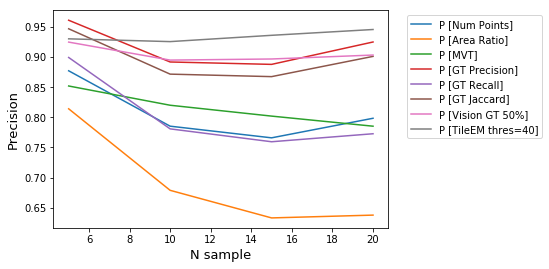

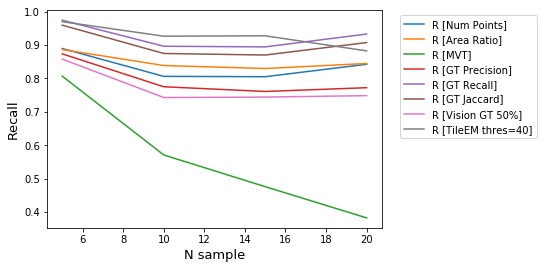

In [178]:
plot_sample_worker_PR(selected_attr_lst,y_axis="Precision")

plot_sample_worker_PR(selected_attr_lst,y_axis="Recall")

In [238]:
best_TileEM_attr = 'TileEM thres=40'
selected_attr_lst = ['Num Points','Area Ratio','MVT','GT Jaccard','Vision GT 50%']
selected_attr_lst.append(best_TileEM_attr)
selected_col_lst = selected_attr2col_lst(selected_attr_lst)

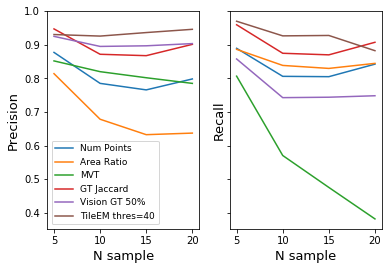

In [252]:
plot_sample_worker_PR_subplots()

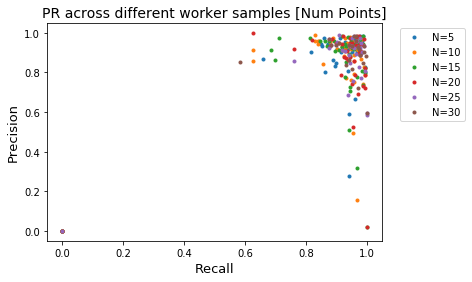

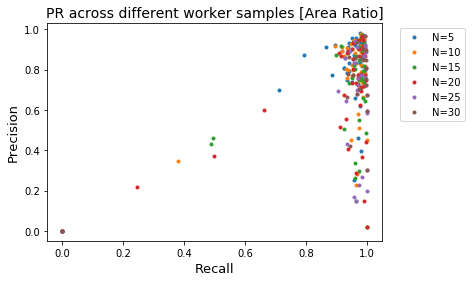

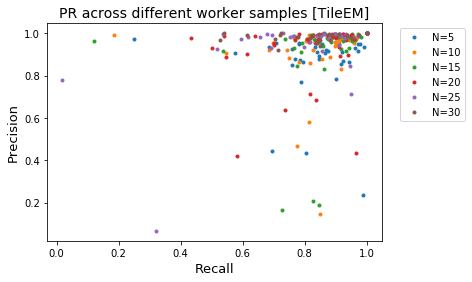

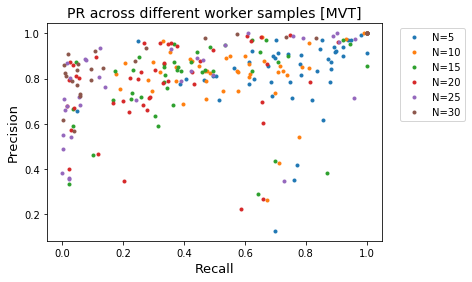

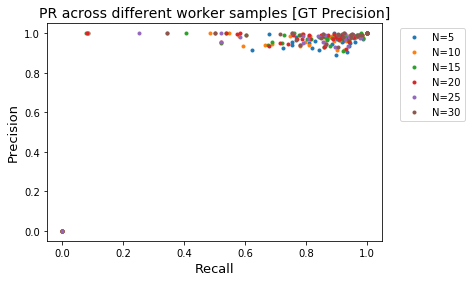

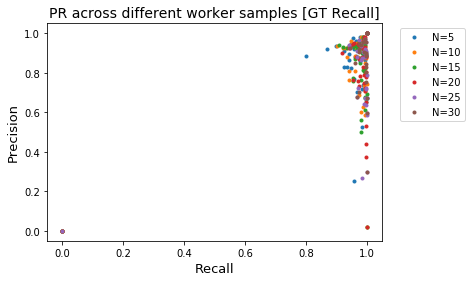

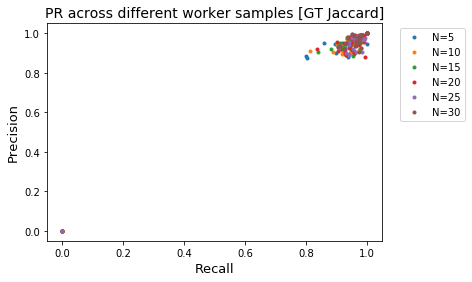

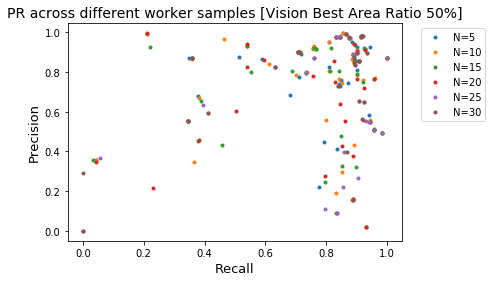

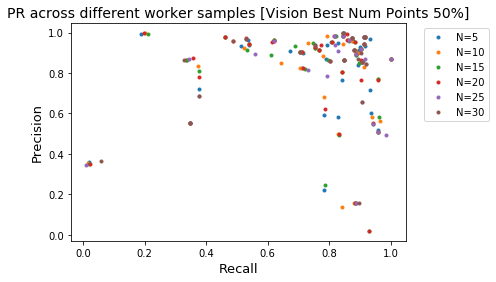

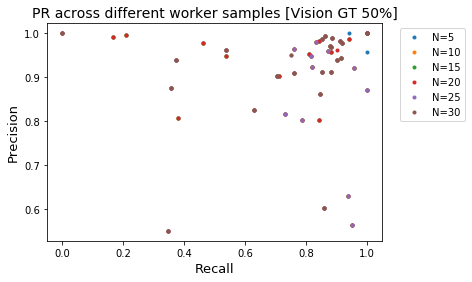

In [139]:
for algo in selected_attr_lst:
    plot_PR_vary_sample_size(algo)

# Effects of varying threshold

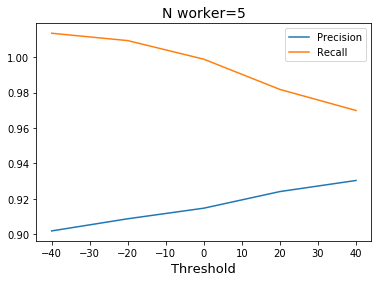

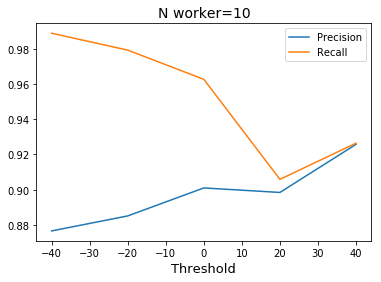

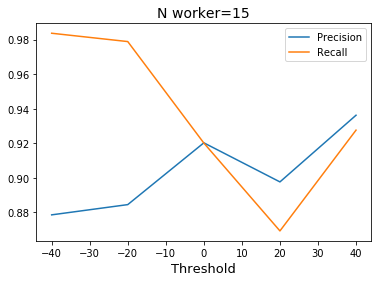

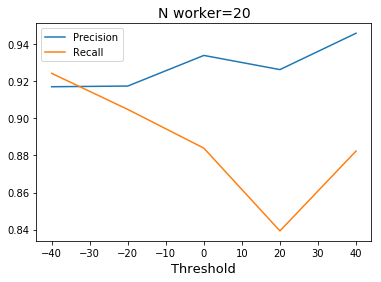

In [179]:
for Nworker in worker_Nbatches.keys()[:4]:
    plot_vary_threshold(Nworker)

# Analysis on Difficult Tasks

In [ ]:
task_ambiguity = [1,4,35,40,41,42]
small_area = [1,15,22]
high_numPts=[5,7,9,10,11,12,28,29,30,37]
lossless_vtiles=[ 5,  6,  8,  9, 14, 15, 18, 19, 20, 21, 23, 24, 25, 27, 29, 30,33, 35, 37, 46] #  with decent looking vtiles 
all_hard_tasks = list(set(np.concatenate((task_ambiguity,small_area,high_numPts))))
easy_tasks = [objid  for objid in object_lst if objid not in all_hard_tasks]
selected_objids = [objid  for objid in easy_tasks if objid not in lossless_vtiles]

In [ ]:
filtered_df = batch_all_data[batch_all_data.index.isin(task_ambiguity)]
filtered_df.mean()

In [ ]:
filtered_df = batch_all_data[batch_all_data.index.isin(all_hard_tasks)]
filtered_df.mean()

In [ ]:
Both Num Points and Area ratio are somewhat recall heavy, they don't work as well when the task is ambiguous

In [ ]:
filtered_df = batch_all_data[batch_all_data.index.isin(task_ambiguity)]
filtered_df.mean()

# Examining Good and bad workers 

---------------------------------------------------------------------------------------------------------